Per Gerhard's instructions:
recreate the plot below with only the line for NIR_SNR=600, and change
the title to VIS SNR=1000? Also, please delete the 20% margin (shading and words) from this plot.
Modified the auxiliary.py's Summaryplot function making some features optional instead

In [17]:
import glob
import os
import pickle
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib import rcParams
from matplotlib import rc

In [2]:
from auxiliary import *

In [ ]:
rcParamDefault = rcParams

In [3]:
% matplotlib inline

In [4]:
# This logic links sim runs to particular nir_snrs
vvvSnr = 1000
expName = 'snr_vvv%d_nirSens' % vvvSnr
mainDir='/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY\
/DATA_vvv%d/' % vvvSnr
filePattern = 'S20031932003196.L3b_4D*'
fileList = glob.glob(os.path.join(mainDir,filePattern))
snrs = ['NIR_SNR_' + str(k) for k in range(500,850,50)]
simDict = dict.fromkeys(snrs)
for fn in fileList:
    sfx = int(fn.split('.')[1][-2:])
    snr = (sfx - 20) * 50 + 500
    snr = 'NIR_SNR_' + str(snr)
    simDict[snr] = fn

In [5]:
fileList

['/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc']

In [6]:
simDict

{'NIR_SNR_500': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc',
 'NIR_SNR_550': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 'NIR_SNR_600': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 'NIR_SNR_650': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 'NIR_SNR_700': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 'NIR_SNR_750': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 'NIR_SNR_800': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc'}

In [7]:
snrs

['NIR_SNR_500',
 'NIR_SNR_550',
 'NIR_SNR_600',
 'NIR_SNR_650',
 'NIR_SNR_700',
 'NIR_SNR_750',
 'NIR_SNR_800']

In [5]:
trgSNRs = [snr for snr in snrs if '600' in snr]

In [6]:
rhoUnc95Dict = dict.fromkeys(trgSNRs)
for snr in trgSNRs:
    # Get data needed in form of a dict.
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _,rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        # Fill out 95 ptile dictionary for corresponding snr sim - result is a nested dictionary with
        # bands as keys to the internal dict
        rhoUnc95Dict[snr] = GetPtileDict(rhoUncDict) 
pickle.dump(rhoUnc95Dict,open('%s.p' % expName,'wb'))

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc


In [49]:
df95 = pd.DataFrame(rhoUnc95Dict)
df95.dropna(axis=1,how='all',inplace=True)
df95.to_pickle('df_%s.p' % expName)

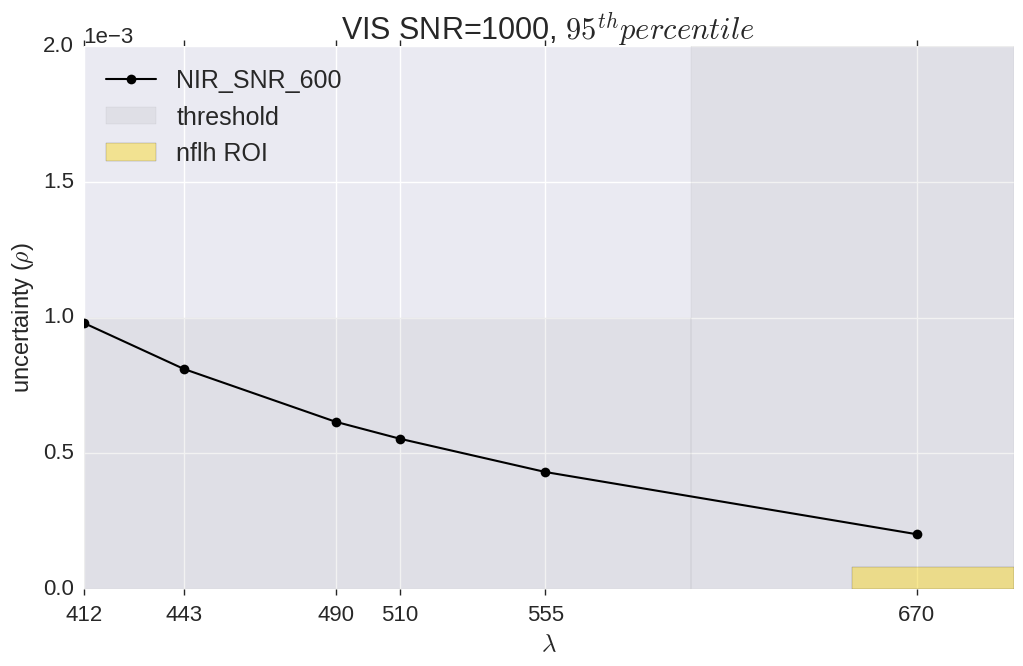

In [50]:
SummaryPlot(df95,savepath='snrSens_vvv%dnir600.png' % vvvSnr,
           title=r'VIS SNR=%d, $95^{th} percentile$ ' % vvvSnr)

In [10]:
rhoUncDict.keys()

dict_keys(['412', '555', '443', '670', '490', '510', '865', '765'])

In [96]:
def PlotHistogram(data,rng=None,figHndl=None, axHndl=None,name=None):
    #rc('text',usetex=True)
    #rcParams['xtick.minor.visible'] = True
    #rcParams['xtick.minor.size'] = 5
    #rcParams['xtick.minor.width'] = 2
    #rcParams['xtick.direction'] = 'Down'
    if not figHndl:
        figHndl = pl.figure(figsize=(12,7))
    if not axHndl:
        axHndl =figHndl.add_subplot(111)
    if not rng:
        rng = (data.min(), data.max())
    axHndl.hist(data, bins=100, histtype='stepfilled', range=rng, normed=True,
           label=r'$%s$' % name)
    return figHndl, axHndl

In [62]:
ax412.get_ylim()

(0.0, 3500.0)

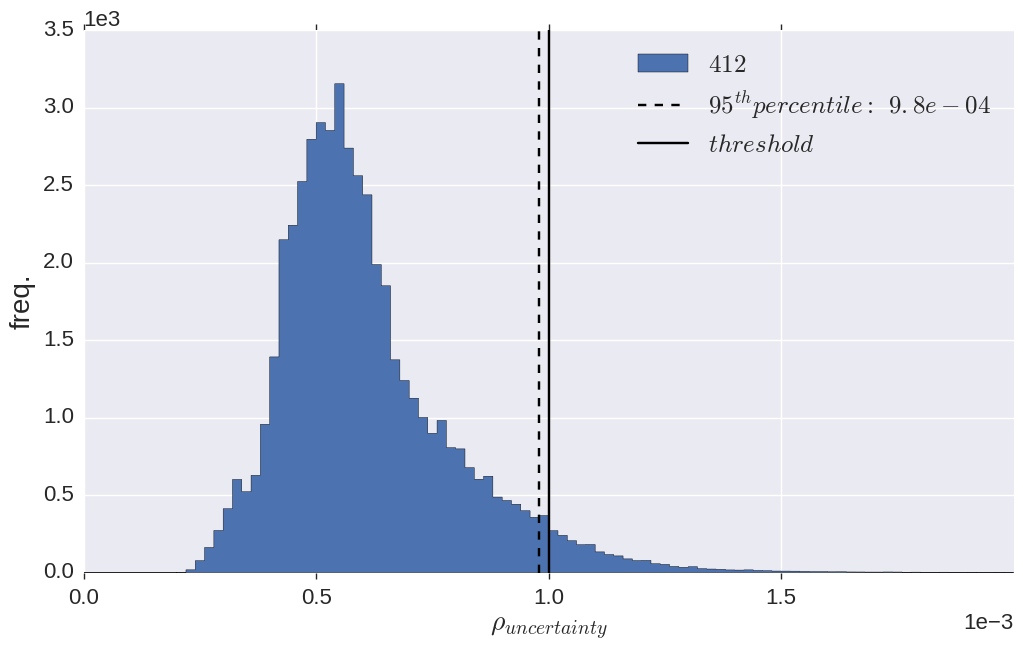

In [99]:
import numpy as np
import matplotlib.ticker as mticker
p95_412 = rhoUnc95Dict['NIR_SNR_600']['412']
sb.set_style("darkgrid",{"xtick.major.size":4,
                        "xtick.direction": "Down"})
xtickslocs = np.arange(0, 2e-3, step=5e-4)
f412, ax412 = PlotHistogram(rhoUncDict['412'],rng=(0,2e-3),name='412')
ax412.xaxis.set_major_locator(mticker.FixedLocator(xtickslocs))
ax412.set_xlabel(r'$\rho_{uncertainty}$',fontsize=20)
ax412.set_ylabel('freq.',fontsize=20)
yMin,yMax = ax412.get_ylim()
ax412.vlines(p95_412, ymin=yMin, ymax=yMax,
             linestyles='--', label=r'$95^{th} percentile:\, \ %.1e$' %p95_412)
ax412.vlines(1.0e-3, yMin, yMax, label=r'$threshold$')
ax412.legend(fontsize=18)
f412.savefig('hist412.png',format='png', dpi=300);

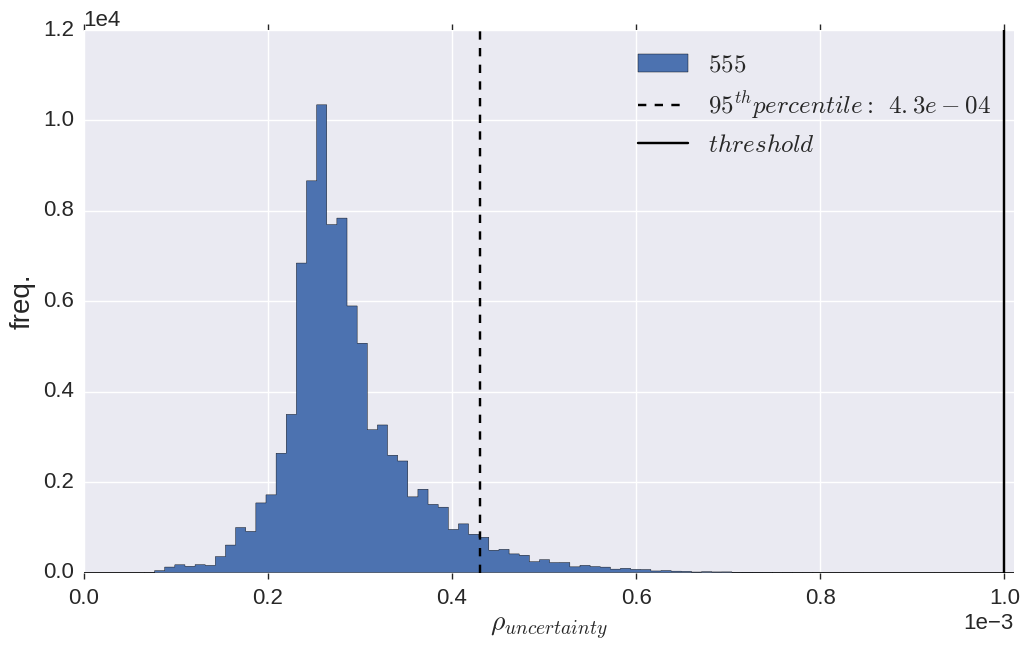

In [103]:
p95_555 = rhoUnc95Dict['NIR_SNR_600']['555']
f555, ax555 = PlotHistogram(rhoUncDict['555'], name='555',rng=(0, 1.1e-3))
ax555.set_xlabel(r'$\rho_{uncertainty}$', fontsize=20)
ax555.set_ylabel('freq.', fontsize=20)
yMin, yMax = ax555.get_ylim()
ax555.set_xlim(0,1.01e-3)
ax555.vlines(p95_555, ymin=yMin, ymax=yMax,
             linestyles='--', label=r'$95^{th}percentile:\, \ %.1e$' %p95_555)
ax555.vlines(1e-3, yMin, yMax, label=r'$threshold$')
ax555.legend(fontsize=18)
f555.savefig('hist555.png',format='png', dpi=300)